In [52]:
import pandas as pd
import seaborn as sns

In [58]:
alphas = [0,0.65,1]
rankings = {}
for alpha in alphas:
    df = pd.read_csv('./ranks/alpha_' + str(alpha) + '_corrected_non_aggr.desc',header = None)
    #df = pd.read_csv('ranking_'+str(alpha),header = None)
    df = df[df.index<100]
    rankings[str(alpha)] = {k: i for i, k in enumerate(df[0].tolist())}

In [59]:
intersection_0_065 = set(rankings['0'].keys()).intersection(set(rankings['0.65'].keys())) 
intersection_0_1 = set(rankings['0'].keys()).intersection(set(rankings['1'].keys())) 
intersection_065_1 = set(rankings['0.65'].keys()).intersection(set(rankings['1'].keys()))

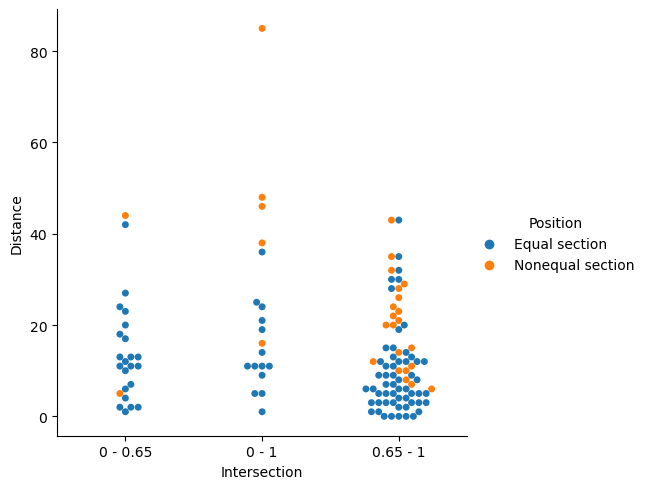

In [60]:
## Intersection 0 - 0.65
inter = []
distance = []
position = []

inter_0_065_section = []


for g in intersection_0_065:
    value_0 = rankings['0'][g]
    value_065 = rankings['0.65'][g]
    same_section = "Equal section" if (value_0 > 50 and value_065 > 50) or (value_0 < 50 and value_065 < 50) else "Nonequal section"
    position.append(same_section)
    if (value_0 > 50 and value_065 > 50) or (value_0 < 50 and value_065 < 50):
        inter_0_065_section.append(g)
    total_value = abs(value_0 - value_065)
    inter.append("0 - 0.65")
    distance.append(total_value)
    
inter_0_1_section = []
    
## Intersection 0 - 1
for i, g in enumerate(intersection_0_1):
    value_0 = rankings['0'][g]
    value_1 = rankings['1'][g]
    same_section = "Equal section" if (value_0 > 50 and value_1 > 50) or (value_0 < 50 and value_1 < 50) else "Nonequal section"
    position.append(same_section)
    if (value_0 > 50 and value_1 > 50) or (value_0 < 50 and value_1 < 50):
        inter_0_1_section.append(g)
    total_value = abs(value_0 - value_1)
    inter.append("0 - 1")
    distance.append(total_value)

inter_065_1_section = []

## Intersection 0.65 - 1
for i, g in enumerate(intersection_065_1):
    value_065 = rankings['0.65'][g]
    value_1 = rankings['1'][g]
    same_section = "Equal section" if (value_065 > 50 and value_1 > 50) or (value_065 < 50 and value_1 < 50) else "Nonequal section"
    position.append(same_section)
    if (value_065 > 50 and value_1 > 50) or (value_065 < 50 and value_1 < 50):
        inter_065_1_section.append(g)
    total_value = abs(value_065 - value_1)
    inter.append("0.65 - 1")
    distance.append(total_value)

    
d = {'Intersection': inter, 'Distance': distance, 'Position': position}
df = pd.DataFrame(data=d)

sns_plot = sns.catplot(data=df, x="Intersection", y="Distance", hue="Position", kind="swarm")
sns_plot.savefig("./plots_ranks/differences_ranking_genes_corrected_non_aggr.png")

In [61]:
print("Intersection 0 - 0.65")
print("Total genes: " + str(len(intersection_0_065)) + " of 100.")
print("Equal section: " + str(len(inter_0_065_section)) + ".")
print("Nonequal section: " + str(len(intersection_0_065) - len(inter_0_065_section)) + ".")
print("\n")
print("Intersection 0 - 1")
print("Total genes: " + str(len(intersection_0_1)) + " of 100.")
print("Equal section: " + str(len(inter_0_1_section)) + ".")
print("Nonequal section: " + str(len(intersection_0_1) - len(inter_0_1_section)) + ".")
print("\n")
print("Intersection 0.65 - 1")
print("Total genes: " + str(len(intersection_065_1)) + " of 100.")
print("Equal section: " + str(len(inter_065_1_section)) + ".")
print("Nonequal section: " + str(len(intersection_065_1) - len(inter_065_1_section)) + ".")

Intersection 0 - 0.65
Total genes: 24 of 100.
Equal section: 22.
Nonequal section: 2.


Intersection 0 - 1
Total genes: 19 of 100.
Equal section: 14.
Nonequal section: 5.


Intersection 0.65 - 1
Total genes: 78 of 100.
Equal section: 57.
Nonequal section: 21.


In [62]:
inter_eq = set(inter_065_1_section).intersection(set(inter_0_1_section))
inter_eq_2 = set(inter_0_065_section).intersection(inter_eq)
print("Overlap between all the Equal section genes: " + str(len(inter_eq_2)))
print("\n")

genes_section = []
pos_0 = []
pos_1 = []
pos_065 = []

for g in inter_eq_2: 
    genes_section.append(g)
    pos_0.append(rankings[str(0)][g])
    pos_065.append(rankings[str(0.65)][g])
    pos_1.append(rankings[str(1)][g])
    
d_section = {'Gene': genes_section, 'Pos ranking 0': pos_0, 'Pos ranking 0.65': pos_065, 'Pos ranking 1': pos_1}
df_section = pd.DataFrame(data=d_section)
print(df_section)
df_section.to_csv("./plots_ranks/Overlap_between_all_the_Equal_section_corrected_non_aggr.csv") 

Overlap between all the Equal section genes: 12


      Gene  Pos ranking 0  Pos ranking 0.65  Pos ranking 1
0   PRKACA              0                 4              5
1     TP53              1                 3              6
2      MYC              6                 8             17
3     REST             15                28             40
4     GNB1              4                 6              3
5     AKT1             62                55             98
6     GNAL              2                19             16
7   CTNNB1              8                 7             19
8     EGR1              3                14             27
9    EP300             12                 1              1
10   STAT1             11                 0              0
11  RPS27A              5                11             24
